In [283]:
import numpy as np
import pandas as pd

__Importing the Car Evaluation Dataset__

In [285]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# # metadata 
# print(car_evaluation.metadata) 
  
# # variable information 
# print(car_evaluation.variables)

In [286]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 6)
(1728, 1)


In [287]:
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [288]:
y.describe()

,class
count,1728
unique,4
top,unacc
freq,1210


__One Hot Encoding__

In [290]:
X_encoded = pd.get_dummies(X) # One hot encoding
y_encoded = pd.get_dummies(y) # One hot encoding

# print(X_encoded)
# print(y_encoded)

print(type(X))
print(type(y))

print(X_encoded.shape)
print(y_encoded.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1728, 21)
(1728, 4)


__Dataset Partitioning__

In [292]:
from sklearn.model_selection import train_test_split

# data split, 70% training and 30% temp (temp = validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# 30% temp data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [293]:
X_train

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1178,False,False,True,False,False,False,True,False,False,False,...,True,False,True,False,True,False,False,True,False,False
585,True,False,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False
1552,False,True,False,False,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
1169,False,False,True,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,True,False,False
1033,False,False,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,False
1294,False,False,True,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True
860,True,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1459,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [294]:
y_train

,class_acc,class_good,class_unacc,class_vgood
1178,False,False,False,True
585,False,False,True,False
1552,True,False,False,False
1169,False,False,True,False
1033,False,False,True,False
...,...,...,...,...
1130,False,False,False,True
1294,False,True,False,False
860,True,False,False,False
1459,False,False,True,False


In [295]:
X_val

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
192,False,False,False,True,True,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
834,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
677,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,True,True,False,False
1516,False,True,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1157,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
1450,False,True,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True
244,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,True
907,False,False,True,False,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [296]:
y_val

,class_acc,class_good,class_unacc,class_vgood
192,False,False,True,False
834,False,False,True,False
677,False,False,True,False
1516,False,False,True,False
1157,False,False,False,True
...,...,...,...,...
582,False,False,True,False
1450,True,False,False,False
244,False,False,True,False
907,True,False,False,False


In [297]:
X_test

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
974,False,False,True,False,True,False,False,False,True,False,...,False,True,False,False,False,False,True,True,False,False
78,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
23,False,False,False,True,False,False,False,True,True,False,...,False,False,False,True,False,True,False,True,False,False
813,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1356,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,False,False,True,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False
1221,False,False,True,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
367,False,False,False,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
1428,False,True,False,False,True,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False


In [298]:
y_test

,class_acc,class_good,class_unacc,class_vgood
974,False,False,True,False
78,False,False,True,False
23,False,False,True,False
813,False,False,True,False
1356,False,False,True,False
...,...,...,...,...
998,True,False,False,False
1221,False,False,True,False
367,True,False,False,False
1428,False,False,True,False


__Building a Single Decision Tree__

In [300]:
from sklearn.tree import DecisionTreeClassifier
single_decision_tree_classifier = DecisionTreeClassifier()

In [301]:
single_decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

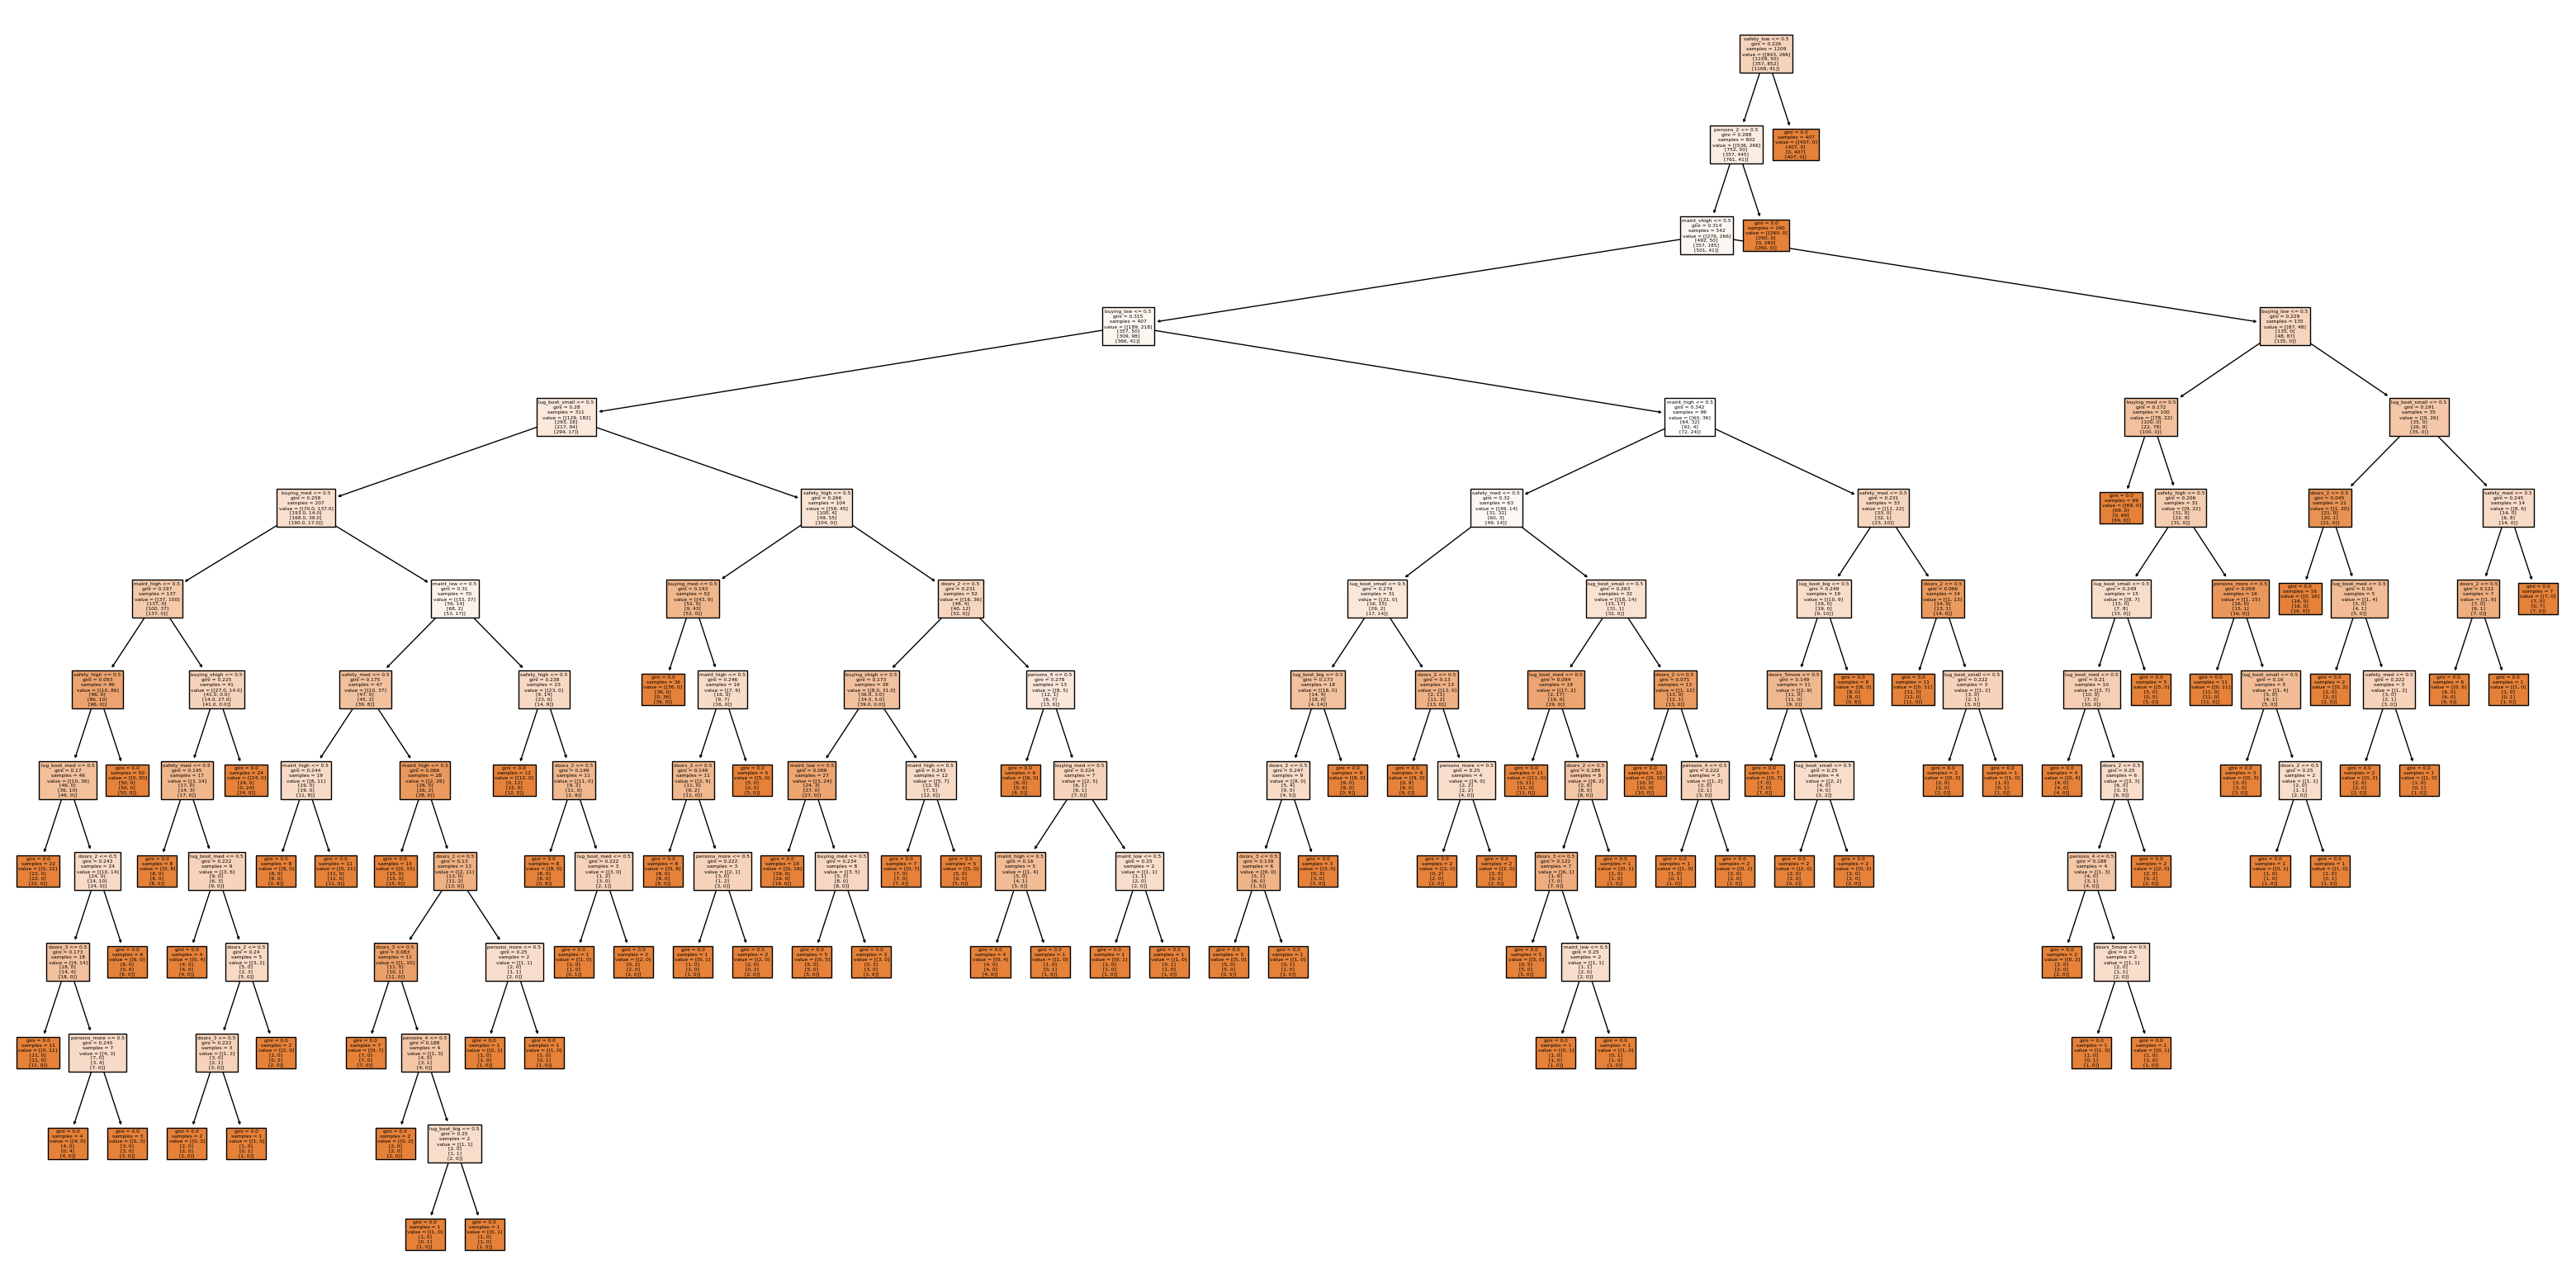

In [302]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(single_decision_tree_classifier, filled=True, feature_names=X_train.columns, class_names=single_decision_tree_classifier.classes_)
plt.show()

__Accuracy of the Single Decision Tree__ on the Validation Set

In [304]:
from sklearn.metrics import accuracy_score

y_val_pred = single_decision_tree_classifier.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.9575289575289575


In [305]:
# y_val contains actual ground truth labels of the validation set
# y_val_pred is our model's prediction on the X_val (validation set)

print(y_val)
print(type(y_val))
print(y_val.shape)

print(y_val_pred)
print(type(y_val_pred))
print(y_val_pred.shape)

      class_acc  class_good  class_unacc  class_vgood
192       False       False         True        False
834       False       False         True        False
677       False       False         True        False
1516      False       False         True        False
1157      False       False        False         True
...         ...         ...          ...          ...
582       False       False         True        False
1450       True       False        False        False
244       False       False         True        False
907        True       False        False        False
1540      False       False         True        False

[259 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
(259, 4)
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [False False  True False]
 [ True False False False]
 [False False  True False]]
<class 'numpy.ndarray'>
(259, 4)


Confusion Matrix on the Validation Set __using the Sklearn Implementation__

In [307]:
from sklearn.metrics import confusion_matrix

y_val_labels = np.argmax(y_val.values, axis=1)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

conf_matrix = confusion_matrix(y_val_labels, y_val_pred_labels)

print("Confusion Matrix using sklearn:")
print(conf_matrix)

Confusion Matrix using sklearn:
[[ 51   1   3   2]
 [  1   8   0   1]
 [  1   0 177   0]
 [  1   1   0  12]]


In [308]:
y_val_rows, y_val_cols = y_val.shape
print(y_val_rows)
print(y_val_cols)

y_val_pred_rows, y_val_pred_cols = y_val_pred.shape
print(y_val_pred_rows)
print(y_val_pred_cols)

if y_val_rows == y_val_pred_rows:
    rows = y_val_rows
    print(f"rows = {rows}")

if y_val_cols == y_val_pred_cols:
    cols = y_val_cols
    print(f"columns = {cols}")

259
4
259
4
rows = 259
columns = 4


Confusion Matrix on the Validation Set __without using the Sklearn Implementation__

In [310]:
acc_acc = acc_good = acc_unacc = acc_vgood = 0
good_acc = good_good = good_unacc = good_vgood = 0
unacc_acc = unacc_good = unacc_unacc = unacc_vgood = 0
vgood_acc = vgood_good = vgood_unacc = vgood_vgood = 0

for i in range(rows):
    actual = y_val.iloc[i].values # <class 'pandas.core.frame.DataFrame'>
    predicted = y_val_pred[i] # <class 'numpy.ndarray'>
    
    if actual[0] == True and predicted[0] == True:
        acc_acc += 1
    elif actual[0] == True and predicted[1] == True:
        acc_good += 1
    elif actual[0] == True and predicted[2] == True:
        acc_unacc += 1
    elif actual[0] == True and predicted[3] == True:
        acc_vgood += 1
    
    if actual[1] == True and predicted[0] == True:
        good_acc += 1
    elif actual[1] == True and predicted[1] == True:
        good_good += 1
    elif actual[1] == True and predicted[2] == True:
        good_unacc += 1
    elif actual[1] == True and predicted[3] == True:
        good_vgood += 1

    if actual[2] == True and predicted[0] == True:
        unacc_acc += 1
    elif actual[2] == True and predicted[1] == True:
        unacc_good += 1
    elif actual[2] == True and predicted[2] == True:
        unacc_unacc += 1
    elif actual[2] == True and predicted[3] == True:
        unacc_vgood += 1

    if actual[3] == True and predicted[0] == True:
        vgood_acc += 1
    elif actual[3] == True and predicted[1] == True:
        vgood_good += 1
    elif actual[3] == True and predicted[2] == True:
        vgood_unacc += 1
    elif actual[3] == True and predicted[3] == True:
        vgood_vgood += 1

print("Confusion Matrix:")
print(f"[{acc_acc}, {acc_good}, {acc_unacc}, {acc_vgood}]")
print(f"[{good_acc}, {good_good}, {good_unacc}, {good_vgood}]")
print(f"[{unacc_acc}, {unacc_good}, {unacc_unacc}, {unacc_vgood}]")
print(f"[{vgood_acc}, {vgood_good}, {vgood_unacc}, {vgood_vgood}]")

Confusion Matrix:
[51, 1, 3, 2]
[1, 8, 0, 1]
[1, 0, 177, 0]
[1, 1, 0, 12]


__Manually Calculate the Validation Set's Accuracy from the Manually Built Confusion Matrix__

In [312]:
print((acc_acc + good_good + unacc_unacc + vgood_vgood) / (acc_acc + acc_good + acc_unacc + acc_vgood + good_acc + good_good + good_unacc + good_vgood + unacc_acc + unacc_good + unacc_unacc + unacc_vgood + vgood_acc + vgood_good + vgood_unacc + vgood_vgood))

0.9575289575289575


__Accuracy of the Single Decision Tree__ on the Test Set

In [314]:
from sklearn.metrics import accuracy_score

y_test_pred = single_decision_tree_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.9538461538461539


In [315]:
# y_test contains actual ground truth labels of the test set
# y_test_pred is our model's prediction on the X_test (test set)

print(y_test)
print(type(y_test))
print(y_test.shape)

print(y_test_pred)
print(type(y_test_pred))
print(y_test_pred.shape)

      class_acc  class_good  class_unacc  class_vgood
974       False       False         True        False
78        False       False         True        False
23        False       False         True        False
813       False       False         True        False
1356      False       False         True        False
...         ...         ...          ...          ...
998        True       False        False        False
1221      False       False         True        False
367        True       False        False        False
1428      False       False         True        False
1118       True       False        False        False

[260 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
(260, 4)
[[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [ True False False False]
 [False False  True False]
 [ True False False False]]
<class 'numpy.ndarray'>
(260, 4)


Confusion Matrix on the Test Set __using the Sklearn Implementation__

In [317]:
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test.values, axis=1)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

conf_matrix = confusion_matrix(y_test_labels, y_test_pred_labels)

print("Confusion Matrix using sklearn:")
print(conf_matrix)

Confusion Matrix using sklearn:
[[ 54   3   3   1]
 [  0   9   0   0]
 [  2   0 178   0]
 [  2   1   0   7]]


In [318]:
y_test_rows, y_test_cols = y_test.shape
print(y_test_rows)
print(y_test_cols)

y_test_pred_rows, y_test_pred_cols = y_test_pred.shape
print(y_test_pred_rows)
print(y_test_pred_cols)

if y_test_rows == y_test_pred_rows:
    rows = y_test_rows
    print(f"rows = {rows}")

if y_test_cols == y_test_pred_cols:
    cols = y_test_cols
    print(f"columns = {cols}")

260
4
260
4
rows = 260
columns = 4


Confusion Matrix on the Validation Set __without using the Sklearn Implementation__

In [320]:
acc_acc = acc_good = acc_unacc = acc_vgood = 0
good_acc = good_good = good_unacc = good_vgood = 0
unacc_acc = unacc_good = unacc_unacc = unacc_vgood = 0
vgood_acc = vgood_good = vgood_unacc = vgood_vgood = 0

for i in range(rows):
    actual = y_test.iloc[i].values # <class 'pandas.core.frame.DataFrame'>
    predicted = y_test_pred[i] # <class 'numpy.ndarray'>
    
    if actual[0] == True and predicted[0] == True:
        acc_acc += 1
    elif actual[0] == True and predicted[1] == True:
        acc_good += 1
    elif actual[0] == True and predicted[2] == True:
        acc_unacc += 1
    elif actual[0] == True and predicted[3] == True:
        acc_vgood += 1
    
    if actual[1] == True and predicted[0] == True:
        good_acc += 1
    elif actual[1] == True and predicted[1] == True:
        good_good += 1
    elif actual[1] == True and predicted[2] == True:
        good_unacc += 1
    elif actual[1] == True and predicted[3] == True:
        good_vgood += 1

    if actual[2] == True and predicted[0] == True:
        unacc_acc += 1
    elif actual[2] == True and predicted[1] == True:
        unacc_good += 1
    elif actual[2] == True and predicted[2] == True:
        unacc_unacc += 1
    elif actual[2] == True and predicted[3] == True:
        unacc_vgood += 1

    if actual[3] == True and predicted[0] == True:
        vgood_acc += 1
    elif actual[3] == True and predicted[1] == True:
        vgood_good += 1
    elif actual[3] == True and predicted[2] == True:
        vgood_unacc += 1
    elif actual[3] == True and predicted[3] == True:
        vgood_vgood += 1

print("Confusion Matrix:")
print(f"[{acc_acc}, {acc_good}, {acc_unacc}, {acc_vgood}]")
print(f"[{good_acc}, {good_good}, {good_unacc}, {good_vgood}]")
print(f"[{unacc_acc}, {unacc_good}, {unacc_unacc}, {unacc_vgood}]")
print(f"[{vgood_acc}, {vgood_good}, {vgood_unacc}, {vgood_vgood}]")

Confusion Matrix:
[54, 3, 3, 1]
[0, 9, 0, 0]
[2, 0, 178, 0]
[2, 1, 0, 7]


__Manually Calculate the Test Set's Accuracy from the Manually Built Confusion Matrix__

In [322]:
print((acc_acc + good_good + unacc_unacc + vgood_vgood) / (acc_acc + acc_good + acc_unacc + acc_vgood + good_acc + good_good + good_unacc + good_vgood + unacc_acc + unacc_good + unacc_unacc + unacc_vgood + vgood_acc + vgood_good + vgood_unacc + vgood_vgood))

0.9538461538461539
